# ClusterAI: Desafio Voice

El siguiente desafio tiene el objetivo de lograr el mejor resultado de clasificacion. Para eso deberan:
- Importar las librerias que consideren necesarias.
- Importar el dataset.
- Realizar los pre-procesamientos que consideren necesarios.
- Realizar la visualizacion o estadistica descriptiva que consideren necesaria.
- Aplicar feature selection (o no) para luego usar esas features en un modelo clasificador.
- Entrenar un modelo supervisado de clasificacion y reportar los resultados.
- Las etiquetas de cada muestra estan en la ultima columna "label"

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importamos librerias de scikit learn para clasificacion y modelos de SVM.
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# importamos librearias de Logistic Regression
from sklearn.linear_model import LogisticRegression

In [4]:
#Importamos librerias de Feature Selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold

In [5]:
# Importamos librerias de PCA
from sklearn.decomposition import PCA

In [6]:
pwd

'C:\\Users\\Administrator.OMSWV4XTWIYHGZM\\Documents\\ClusterAI\\material_suplementario'

In [7]:
voice = pd.read_csv(r'C:\\Users\\Administrator.OMSWV4XTWIYHGZM\\Documents\\ClusterAI\\material_suplementario/clusterai_2019_desafio_dataset_voice.csv', delimiter=',')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
voice.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [9]:
#reemplazo los valores string de la feature "label" por floats . El "male" por 0 y el "female" por 1
voice.label[voice.label == 'male'] = '0'
voice.label[voice.label == 'female'] = '1'
voice.head()

C:\Users\Administrator.OMSWV4XTWIYHGZM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator.OMSWV4XTWIYHGZM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [10]:
#las features contienen valores CONTINUOS, por lo que corresonde aplicar alguns modelos de regresion que vimo en clases, 
#para poder predecir si la voz es femenina o masculina, acorde a los valores de la features.

# Separamos nuestra variable independiente X y nuestra variable Y

In [11]:
x = voice.iloc[:,0:20]
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [12]:
y = voice.iloc[:,20]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: object

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

# Realizamos Auto Scaling

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [15]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest) 

In [17]:
xtrain_scal.shape

(2217, 20)

## SVM con Gridserch y cross validation

In [18]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [19]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100], 'gamma':[0.1, 1,10]}
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clf.fit(xtrain_scal, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.98


In [21]:
ypred_train_svm = clf.predict(xtrain_scal)
train_acc_svm = accuracy_score(ytrain,ypred_train_svm)
print("El train accuracy con SVM es " + str(train_acc_svm))

El train accuracy con SVM es 0.9990978800180425


In [22]:
ypred_test_svm = clf.predict(xtest_scal)
test_acc_svm = accuracy_score(ytest,ypred_test_svm)
print("El test accuracy con SVM es " + str(test_acc_svm))

El test accuracy con SVM es 0.9789695057833859


In [23]:
yproba_svm = clf.predict_proba(xtest_scal)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(ytest.astype('int'), yproba_svm[:,1], drop_intermediate = False)
auc_svm = metrics.auc(fpr_svm, tpr_svm)
print("El AUC con SVM es = " + str(auc_svm))

El AUC con SVM es = 0.9968103555060077


## KNN con Gridserch y cross validation

Hacemos una comparacion con KNN variando el valor de K vecinos
¿que sucede si probamos distintos valores de K? ¿como se modificara el accuracy?

In [24]:
# indicamos la cantidad de valores que queremos probar y lo guardamos en "iteraciones_knn"
iteraciones_knn = 50
# creo un vector de 50 posiciones para guardar los resultados de accuracy.
acc_knn = np.zeros(iteraciones_knn)

In [25]:
# hago un for loop para ir entrenando un clasificador en cada iteracion e ir probando distintos valores de k
for r in range(0,iteraciones_knn):
    # entreno un KNN classifier con "k=r+1"
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scal,ytrain)
    # calculo la prediccion
    ypred_knn = neigh.predict(xtest_scal)
    # guardo el resultado de prediccion en la posicion r del vector "acc_knn"
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

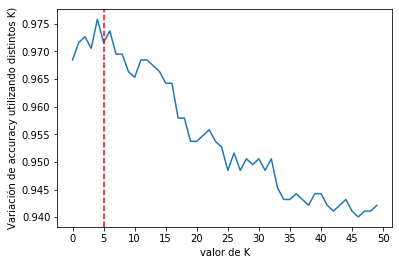

In [26]:
# imprimimos en pantalla el accuracy para cada valor de K
# vemos que con un valor de 5 obtenemos 0.9 de accuracy.
plt.plot(acc_knn)
plt.xticks(np.arange(0, 51, 5))
plt.axvline(x=np.argmax(acc_knn)+1, c= 'r', linestyle = '--')
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
plt.show()

In [27]:
# defino modelo KNN llamado "neigh"sin definir ningun hiperparametro
neigh_cv = KNeighborsClassifier()
# defino la lista de valores del hiperparametro que quiero probar con gridsearchCV
params_knn = {'n_neighbors':[1,5,10]}
# defino un modelo con gridsearchCV, sus parametros y la cantidad de folds de cross validation.
knn_cv = GridSearchCV(neigh_cv, param_grid = params_knn, refit = True, cv = 5)
knn_cv.fit(xtrain_scal, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
ypred_train_knn = knn_cv.predict(xtrain_scal)
train_acc_knn = accuracy_score(ytrain, ypred_train_knn)
print("El train accuracy con KNN es " + str(train_acc_knn))

El train accuracy con KNN es 0.9837618403247632


In [29]:
ypred_knn = knn_cv.predict(xtest_scal)
test_acc_knn = accuracy_score(ytest, ypred_knn)
print("El test accuracy con KNN es " + str(test_acc_knn))

El test accuracy con KNN es 0.9758149316508938


In [30]:
#compute AUC
yproba_knn_cv = knn_cv.predict_proba(xtest_scal)
fpr_knn_cv, tpr_knn_cv, thresholds_knn_cv = roc_curve(ytest.astype('int'), yproba_knn_cv[:,1], drop_intermediate = False)
auc_knn_cv = metrics.auc(fpr_knn_cv, tpr_knn_cv)
print("El AUC con KNN es = " + str(auc_knn_cv))

El AUC con KNN es = 0.9929239440109006


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
# definimos el modelo LR bajo el nombre "lr_model"
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
params_lr = {'C':[1, 10, 100]}
# definimos el gridsearchcv indicando el modelo, la grilla de parametros y la cantidad de "folds" de cross validation, en este caso 5.
lr_cv = GridSearchCV(lr_model, param_grid = params_lr, refit = True, cv = 5)
lr_cv.fit(xtrain_scal, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
lr_cv.best_params_

{'C': 1}

In [33]:
ypred_train_lr = lr_cv.predict(xtrain_scal)
train_acc_lr = accuracy_score(ytrain,ypred_train_lr)
print("El train accuracy con LR es " + str(train_acc_lr))

El train accuracy con LR es 0.9760938204781235


In [34]:
ypred_lr = lr_cv.predict(xtest_scal)
test_acc_lr = accuracy_score(ytest,ypred_lr)
print("El test accuracy con LR es " + str(test_acc_lr))

El test accuracy con LR es 0.9716088328075709


In [35]:
yproba_lr = lr_cv.predict_proba(xtest_scal)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(ytest.astype('int'), yproba_lr[:,1], drop_intermediate = False)
auc_lr = metrics.auc(fpr_lr, tpr_lr)
print("El AUC de LR es = " + str(auc_lr))

El AUC de LR es = 0.9937003415264285


# Analisis de Componentes Principales (PCA)
Vamos a obtener primeros autovalores y autovectores (eigenvalues y eigenvectors) de la matriz de train "xtrain_scal". 

In [36]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [37]:
# observamos el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo de 30 a 10 dimensiones
xpca.shape

(2217, 10)

# Observamos los autovalores obtenidos del PCA

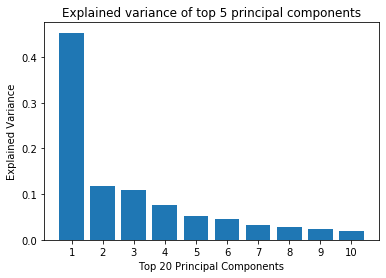

In [38]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

# Feature Selection con Variance Threshold

Computamos el desvio standard de cada feature. Luego decidimos quedarnos con aquellas cuyo STDEV sea mayor a un cuantil determinado. Eso resultara de un vector "mascara" booleano que nos serirá para filtrar el dataset original. Vean que este metodo es no supervisado aunque su debilidad es que es univariado.

In [39]:
# umbral para definir con que % de features nos quedamos
thresh = 0.5

In [40]:
xtrain_scal_red_var = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]
xtest_scal_red_var = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]

In [41]:
print("La cantidad de Features seleccionadas son " + str(np.shape(xtrain_scal_red_var)[1]))

La cantidad de Features seleccionadas son 10


In [42]:
xtrain_scal_red_var.columns

Index(['Q25', 'skew', 'kurt', 'sfm', 'mode', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx'],
      dtype='object')

In [43]:
x.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [44]:
feat_red_var = np.where(x.columns.isin(xtrain_scal_red_var.columns))
print(feat_red_var)

(array([ 3,  6,  7,  9, 10, 15, 16, 17, 18, 19], dtype=int64),)


In [45]:
# generamos nuestro nuevo training set con las columnas seleccionadas luego de Variance Threshold
xtrain_scal_red_vt = xtrain_scal[:, x.columns.isin(xtrain_scal_red_var.columns)]
np.shape(xtrain_scal_red_vt)

(2217, 10)

In [46]:
# generamos nuestro nuevo testing set con las columnas seleccionadas luego de Variance Threshold
xtest_scal_red_vt = xtest_scal[:, x.columns.isin(xtrain_scal_red_var.columns)]
np.shape(xtest_scal_red_vt)

(951, 10)

## VT + SVM con Gridserch y cross validation

In [47]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100], 'gamma':[0.1, 1,10]}
svc = svm.SVC(probability=True)
clf_vt = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clf_vt.fit(xtrain_scal_red_vt, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
print("The best parameters are %s with a score of %0.2f" % (clf_vt.best_params_, clf_vt.best_score_))

The best parameters are {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.94


In [49]:
ypred_train_svm_vt = clf_vt.predict(xtrain_scal_red_vt)
train_acc_svm_vt = accuracy_score(ytrain,ypred_train_svm_vt)
print("El train de SVM con VT accuracy es " + str(train_acc_svm_vt))

El train de SVM con VT accuracy es 0.9760938204781235


In [50]:
ypred_svm_vt = clf_vt.predict(xtest_scal_red_vt)
test_acc_svm_vt = accuracy_score(ytest,ypred_svm_vt)
print("El test accuracy de SVM con VT es " + str(test_acc_svm_vt))

El test accuracy de SVM con VT es 0.953732912723449


In [51]:
yproba_svm_vt = clf_vt.predict_proba(xtest_scal_red_vt)
fpr_svm_vt, tpr_svm_vt, thresholds_svm_vt = roc_curve(ytest.astype('int'), yproba_svm_vt[:,1], drop_intermediate = False)
auc_svm_vt = metrics.auc(fpr_svm_vt, tpr_svm_vt)
print("El AUC de SVM con VT es = " + str(auc_svm_vt))

El AUC de SVM con VT es = 0.9881085098476401


# Feature Selection con Lasso

In [52]:
# creamos nuestro modelo de seleccion de variables Lasso_featsel
# El hiperparametro Alpha (o lambda en la teoria) es seleccionado por el usuario
lasso_featsel = Lasso(alpha = 0.01)
lasso_featsel.fit(xtrain_scal,ytrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
from sklearn.linear_model import lasso_path
eps = 5e-3
alphas_lasso, coefs_lasso, _ = lasso_path(xtrain_scal, ytrain, fit_intercept=False)

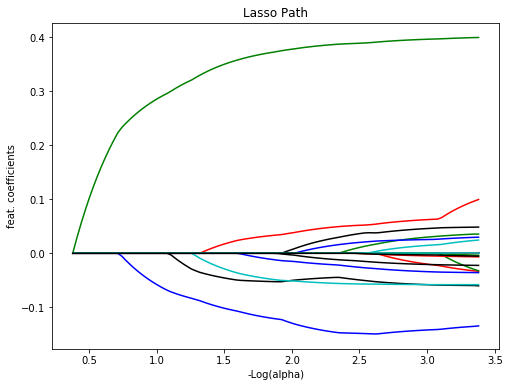

In [54]:
from itertools import cycle
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
plt.figure(figsize=(8,6))
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('feat. coefficients')
plt.title('Lasso Path')
#plt.legend((l1[-1],('Lasso', loc='lower left')
plt.axis('tight')
plt.show()

In [55]:
# observamos que features fueron seleccionadas y con que coeficientes de beta. 
lasso_featsel.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.05022737,
       -0.12942147,  0.03770016,  0.        ,  0.        ,  0.00690633,
       -0.01497342, -0.        ,  0.37774872, -0.05114722, -0.00311634,
        0.        , -0.        ,  0.        ,  0.        , -0.        ])

In [56]:
lasso_num_feat_sel = int(np.count_nonzero(lasso_featsel.coef_))
print("La cantidad de features seleccionadas con Lasso son "+ str(lasso_num_feat_sel))

La cantidad de features seleccionadas con Lasso son 8


In [57]:
# las columnas correspondientes a las features seleccionadas figuran con True
lasso_feat_cols = lasso_featsel.coef_ != 0
lasso_feat_cols

array([False, False, False, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False])

In [58]:
# podemos ver que posicion de feature es la seleccionada para el valor de alpha seleccionado al inicio
feat_lasso = np.where(lasso_feat_cols)
print(feat_lasso)

(array([ 4,  5,  6,  9, 10, 12, 13, 14], dtype=int64),)


In [59]:
# generamos nuestro nuevo training set con las columnas seleccionadas luego de Lasso
xtrain_scal_red_lasso = xtrain_scal[:, lasso_feat_cols]
np.shape(xtrain_scal_red_lasso)

(2217, 8)

In [60]:
# generamos nuestro nuevo testing set con las columnas seleccionadas luego de Lasso
xtest_scal_red_lasso = xtest_scal[:, lasso_feat_cols]
np.shape(xtest_scal_red_lasso)

(951, 8)

## Lasso + SVM con Gridserch y cross validation

In [61]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100], 'gamma':[0.1, 1,10]}
svc = svm.SVC(probability=True)
clf_lasso = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clf_lasso.fit(xtrain_scal_red_lasso, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
print("The best parameters are %s with a score of %0.2f" % (clf_lasso.best_params_, clf_lasso.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.98


In [63]:
ypred_train_svm_lasso = clf_lasso.predict(xtrain_scal_red_lasso)
train_acc_svm_lasso = accuracy_score(ytrain,ypred_train_svm_lasso)
print("El train accuracy de SVM con Lasso es " + str(train_acc_svm_lasso))

El train accuracy de SVM con Lasso es 0.9882724402345512


In [64]:
ypred_svm_lasso = clf_lasso.predict(xtest_scal_red_lasso)
test_acc_svm_lasso = accuracy_score(ytest,ypred_svm_lasso)
print("El test accuracy de SVM con Lasso es " + str(test_acc_svm_lasso))

El test accuracy de SVM con Lasso es 0.9831756046267087


In [65]:
yproba_svm_lasso = clf_lasso.predict_proba(xtest_scal_red_lasso)
fpr_svm_lasso, tpr_svm_lasso, thresholds_svm_lasso = roc_curve(ytest.astype('int'), yproba_svm_lasso[:,1], drop_intermediate = False)
auc_svm_lasso = metrics.auc(fpr_svm_lasso, tpr_svm_lasso)
print("El AUC de SVM con Lasso es = " + str(auc_svm_lasso))

El AUC de SVM con Lasso es = 0.9958061262409088


# Feature Selection con RFE

In [66]:
# creo un modelo clasificador de SVM para clasificar en cada iteracion del RFE y obtener un accuracy
costrfe = 50
svcrfe = svm.SVC(C=costrfe, kernel="linear")

In [67]:
# creo un modelo de RFE indicando que clasificador utilizar, el CV y que scoring quiero determinar para seleccionar las features
rfecv = RFECV(estimator=svcrfe, step=1, cv=5, scoring='accuracy')

In [68]:
# selecciono las variables con el set de train
rfecv.fit(xtrain_scal, ytrain)

RFECV(cv=5,
      estimator=SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3,
                    gamma='auto_deprecated', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [69]:
np.argmax(rfecv.grid_scores_)

14

Optimal number of features : 15


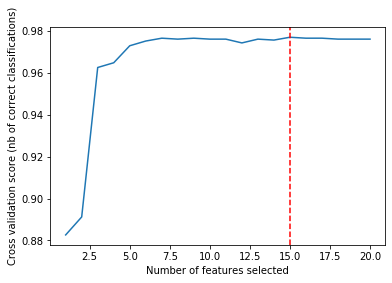

In [70]:
# Imprimo como varia el accuracy a medida que voy quitando features
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.axvline(x=np.argmax(rfecv.grid_scores_)+1, c= 'r', linestyle = '--')
plt.show()

In [71]:
# obtengo las posiciones de las columnas de las features que fueron seleccionadas con True (llamando a .support_)
feat_rfe = rfecv.support_ == True
feat_rfe

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True])

In [72]:
print("La cantidad de variables seleccionadas con RFE son = " + str(rfecv.n_features_))

La cantidad de variables seleccionadas con RFE son = 15


In [73]:
# podemos ver que posicion de feature es la seleccionada para el valor de alpha seleccionado al inicio
feat_rfe = np.where(rfecv.support_)
print(feat_rfe)

(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 17, 19],
      dtype=int64),)


In [74]:
# generamos nuestro nuevo training set con las columnas seleccionadas luego de RFE
xtrain_scal_red_rfe = xtrain_scal[:, rfecv.support_]
np.shape(xtrain_scal_red_rfe)

(2217, 15)

In [75]:
# generamos nuestro nuevo testing set con las columnas seleccionadas luego de RFE
xtest_scal_red_rfe = xtest_scal[:,rfecv.support_]
np.shape(xtest_scal_red_rfe)

(951, 15)

## RFE + SVM con Gridserch y cross validation

In [76]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100], 'gamma':[0.1, 1,10]}
svc = svm.SVC(probability=True)
clf_rfe = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clf_rfe.fit(xtrain_scal_red_rfe, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
print("The best parameters are %s with a score of %0.2f" % (clf_rfe.best_params_, clf_rfe.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.98


In [78]:
ypred_train_svm_rfe = clf_rfe.predict(xtrain_scal_red_rfe)
train_acc_svm_rfe = accuracy_score(ytrain,ypred_train_svm_rfe)
print("El train accuracy de SVM con RFE es " + str(train_acc_svm_rfe))

El train accuracy de SVM con RFE es 0.9968425800631484


In [79]:
ypred_svm_rfe = clf_rfe.predict(xtest_scal_red_rfe)
test_acc_svm_rfe = accuracy_score(ytest,ypred_svm_rfe)
print("El test accuracy de SVM con RFE es " + str(test_acc_svm_rfe))

El test accuracy de SVM con RFE es 0.9852786540483701


In [80]:
yproba_svm_rfe = clf_rfe.predict_proba(xtest_scal_red_rfe)
fpr_svm_rfe, tpr_svm_rfe, thresholds_svm_rfe = roc_curve(ytest.astype('int'), yproba_svm_rfe[:,1], drop_intermediate = False)
auc_svm_rfe = metrics.auc(fpr_svm_rfe, tpr_svm_rfe)
print("El AUC de SVM con RFE es = " + str(auc_svm_rfe))

El AUC de SVM con RFE es = 0.9961025287112243


El test acc mejora con RFE + SVM con Gridserch y cross validation y el train acc y AUC disminuyen apenas levemente